### Wavelete coherence 

In [1]:
import sys; sys.path.insert(1, '/home/vinicius/storage1/projects/GrayData-Analysis')
import os

import numpy  as np 
import xarray as xr

import matplotlib.pyplot  as plt
import GDa.graphics.plot  as plot
import matplotlib.patches as patches
import matplotlib

from   GDa.session           import session_info, session
from   GDa.signal.surrogates import trial_swap_surrogates

from xfrites.conn.conn_spec  import conn_spec

In [2]:
SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE=plot.set_plot_config()

#### Bias of the wavelet coherence 

Following Lachaux et. al. (2002) the bias fo the wavelet coherence can be computed as:

$B = \left(1 + 2\frac{n_{cy}}{n_{co}}\right)^{-1}$

where, $n_{cy}$ is the number of cycles of the wavelet within the integration window $\delta$, and $n_{co}$ the number of cycles of the wavelet. The integration window is given by:

$\delta = n_{cy}/f$

Those function could be used to fit the bias of the wavelet coherence computed for white noise signals.

With our terminology, since we input $\delta$ (sm_times) to the function the bias can be written as:

$B = \left(1 + 2\frac{f\delta}{n_{co}}\right)^{-1}$

From this equation it is expected that the bias will be frequency dependent if $n_{co}$ is constant, and frequency independent if $n_{co}$ is proportional to frequency let's say $n_{co}=f/\sigma_f$, then:

$B = \left(1 + 2\delta\sigma_{t}\right)^{-1}$

By comparing the wavelet coherence measured for white noise we can validate the expression above.

In [3]:
def _bias_lachaux(sm_times, freqs, n_cycles):
    return (1+2*sm_times*freqs/n_cycles)**-1

### Bias of the metric - White noise vs. Analytical

In [4]:
n  = 3650
sf = 1000

eta = xr.DataArray( np.random.normal(0,1,size=(1,30,n)), 
                    dims=("trials","roi","times"), 
                    coords={"times": np.arange(n)/sf})

#### Constant $\delta$, and $n_{co}$ constant

In [5]:
delta    = 1
freqs    = np.linspace(10,100,50)
w_t      = np.linspace(0.1, 2., 20)

n_cycles = 7.

kw = dict(
    freqs=freqs, times="times", roi="roi", foi=None, n_jobs=20, pairs=None, sfreq=1000,
    mode="morlet", n_cycles=n_cycles, decim=delta, metric="coh", sm_kernel="square",
    sm_freqs=1, block_size=1
)

coh_eta = []
for i in range( len(w_t) ):
    kw["sm_times"] = w_t[i]
    coh_eta += [conn_spec(eta, **kw)]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=100, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    1.3s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=200, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.4s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    1.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=300, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.6s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    1.7s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=400, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=500, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=600, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.1s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.1s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.2s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=700, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=800, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.6s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=900, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.7s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1000, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1100, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1200, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.0s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.0s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1300, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.2s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.6s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1400, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.2s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1500, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.3s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.7s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1600, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.6s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1700, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.5s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.5s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.7s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1800, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.6s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1900, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.8s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.9s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=2000, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.8s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.8s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

In [8]:
B   = []
B_t = []

for i in range( len(w_t) ):
    B += [coh_eta[i].isel(times=slice(20,-20)).squeeze().mean(dim=("roi","times"))]
    #B_t += [(1 + 2*n_cy[i]/n_cycles)**-1 ]
    B_t += [_bias_lachaux(w_t[i], freqs, n_cycles) ]

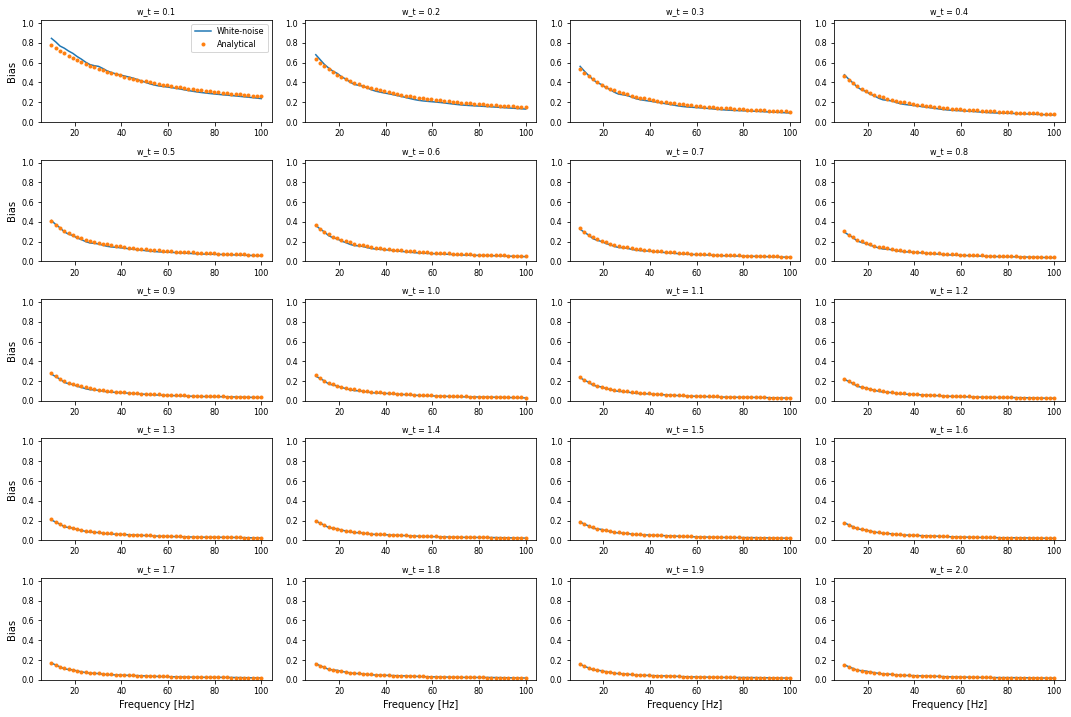

In [10]:
plt.figure(figsize=(15,10))
for i in range( len(w_t) ):
    plt.subplot(5,4,i+1)
    plt.title(f"w_t = {np.round(w_t[i],2)}")
    plt.plot(freqs, B[i], '-')
    #plt.plot(freqs, [B_t[i]]*len(freqs), ".")
    plt.plot(freqs, B_t[i], ".")
    plt.ylim(0,1.03)
    if i==0: plt.legend(["White-noise", "Analytical"])
    if i>15: plt.xlabel("Frequency [Hz]")
    if i%4==0: plt.ylabel("Bias")
plt.tight_layout()

#### Constant $\delta$, and $n_{co}$ proportional to frequency

In [11]:
delta    = 1
freqs    = np.linspace(10,100,50)
w_t      = np.linspace(0.1, 2., 20)

n_cycles = freqs/2.

kw = dict(
    freqs=freqs, times="times", roi="roi", foi=None, n_jobs=20, pairs=None, sfreq=1000,
    mode="morlet", n_cycles=n_cycles, decim=delta, metric="coh", sm_kernel="square",
    sm_freqs=1, block_size=1
)

coh_eta = []
for i in range( len(w_t) ):
    kw["sm_times"] = w_t[i]
    coh_eta += [conn_spec(eta, **kw)]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=100, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.5s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    1.6s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=200, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.6s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    1.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=300, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=400, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=500, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.1s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.3s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=600, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.3s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=700, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.6s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=800, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=900, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1000, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.8s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1100, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.9s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.0s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1200, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.1s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.3s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1300, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.1s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1400, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.2s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1500, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1600, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.5s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.5s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1700, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.6s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1800, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.7s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1900, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.7s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=2000, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.8s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.8s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

In [14]:
B   = []
B_t = []

for i in range( len(w_t) ):
    B += [coh_eta[i].isel(times=slice(20,-20)).squeeze().mean(dim=("roi","times"))]
    #B_t += [(1 + 2*n_cy[i]/n_cycles)**-1 ]
    B_t += [_bias_lachaux(w_t[i], freqs, n_cycles) ]

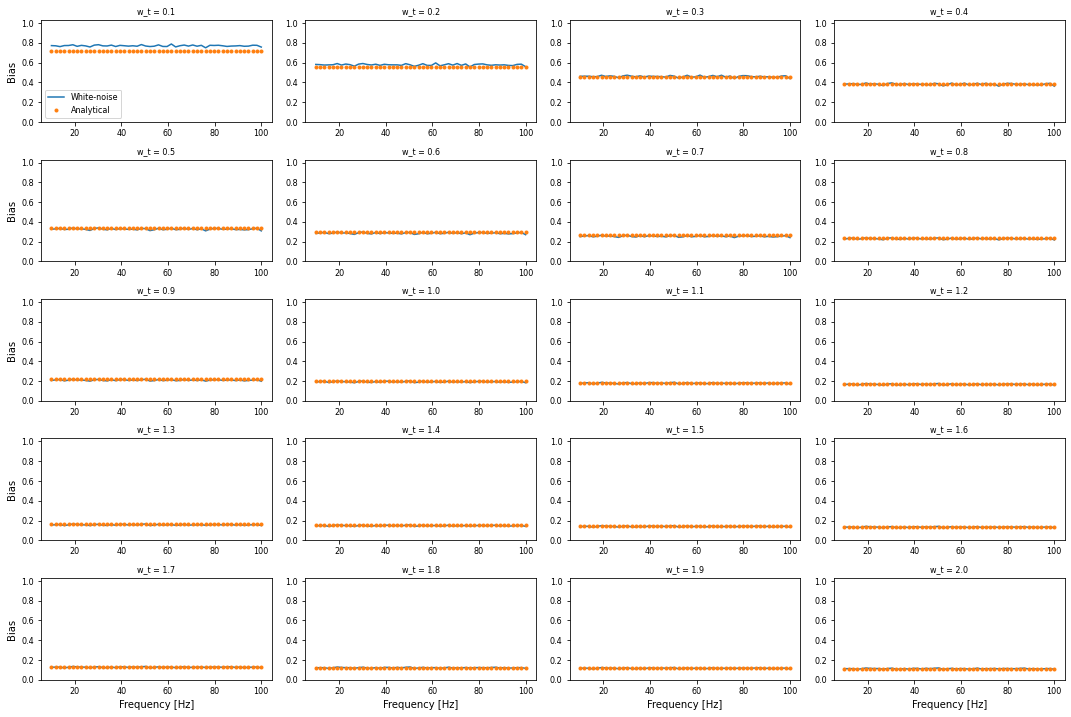

In [16]:
plt.figure(figsize=(15,10))
for i in range( len(w_t) ):
    plt.subplot(5,4,i+1)
    plt.title(f"w_t = {np.round(w_t[i],2)}")
    plt.plot(freqs, B[i], '-')
    #plt.plot(freqs, [B_t[i]]*len(freqs), ".")
    plt.plot(freqs, B_t[i], ".")
    plt.ylim(0,1.03)
    if i==0: plt.legend(["White-noise", "Analytical"])
    if i>15: plt.xlabel("Frequency [Hz]")
    if i%4==0: plt.ylabel("Bias")
plt.tight_layout()

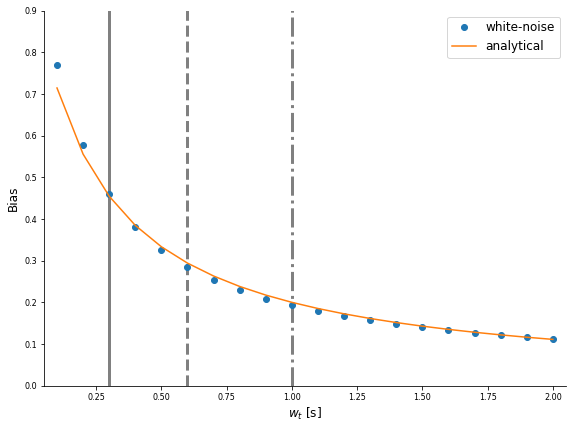

In [64]:
fig = plt.figure(figsize=(8,6))
ax  = plt.subplot(111)
B_total   = np.mean(B, -1)
B_t_total = np.mean(B_t, -1)
plt.plot(w_t, B_total, "o", label="white-noise")
plt.plot(w_t, B_t_total, "-", label="analytical")
plt.legend(fontsize=BIGGER_SIZE)
plt.vlines(0.3, 0, 9, "gray", lw=3)
plt.vlines(0.6, 0, 9, "gray", ls="--", lw=3)
plt.vlines(1.0, 0, 9, "gray", ls="-.", lw=3)
plt.ylim(0, .9)
plt.xlim(0.05, 2.05)
plt.ylabel("Bias", fontsize=BIGGER_SIZE)
plt.xlabel(r"$w_t$ [s]", fontsize=BIGGER_SIZE)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

#### Variable $\delta$, and $n_{co}$ constant

In [ ]:
delta    = 1
freqs    = np.linspace(10,100,50)
n_cy     = np.linspace(1, 40, 20)

n_cycles = 7.

kw = dict(
    freqs=freqs, times="times", roi="roi", foi=None, n_jobs=20, pairs=None, sfreq=1000,
    mode="morlet", n_cycles=n_cycles, decim=delta, metric="coh", sm_kernel="square",
    sm_freqs=1, block_size=1
)



coh_eta = []
for i in range( len(n_cy) ):
    # compute the coherence
    kw["sm_times"] = n_cy[i]/freqs
    coh_eta += [conn_spec(eta, **kw)]

In [13]:
B   = []
B_t = []

for i in range( len(n_cy) ):
    B += [coh_eta[i].isel(times=slice(20,-20)).squeeze().mean(dim=("roi","times"))]
    #B_t += [(1 + 2*n_cy[i]/n_cycles)**-1 ]
    B_t += [_bias_lachaux(n_cy[i]/freqs, freqs, n_cycles) ]

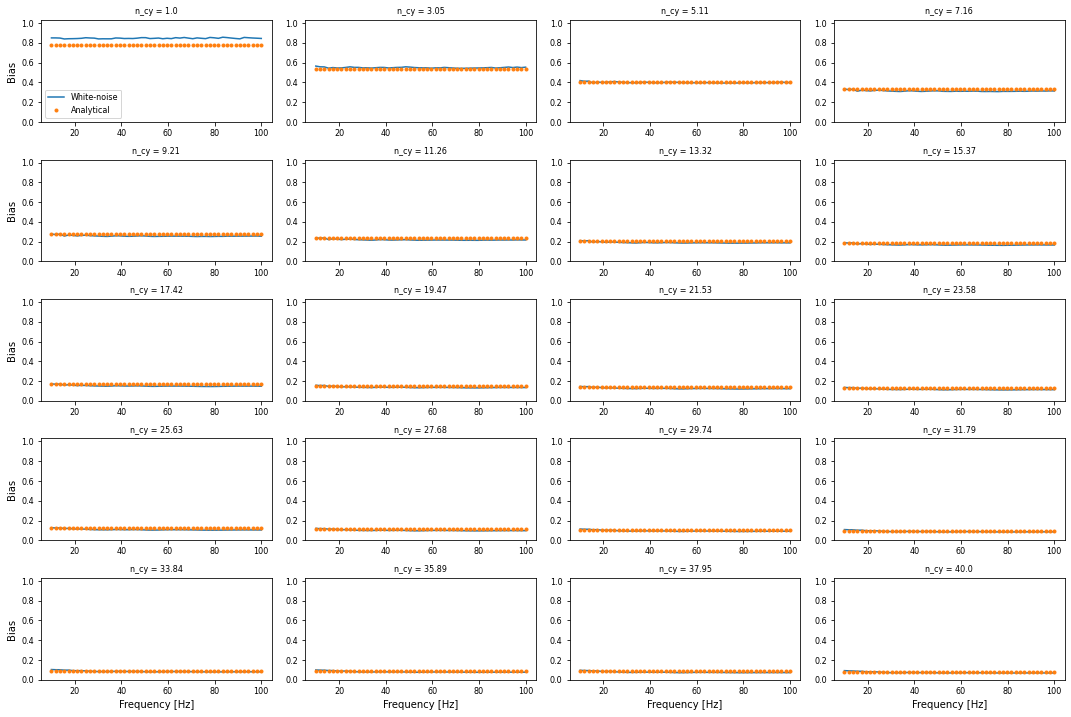

In [14]:
plt.figure(figsize=(15,10))
for i in range( len(n_cy) ):
    plt.subplot(5,4,i+1)
    plt.title(f"n_cy = {np.round(n_cy[i],2)}")
    plt.plot(freqs, B[i], '-')
    #plt.plot(freqs, [B_t[i]]*len(freqs), ".")
    plt.plot(freqs, B_t[i], ".")
    plt.ylim(0,1.03)
    if i==0: plt.legend(["White-noise", "Analytical"])
    if i>15: plt.xlabel("Frequency [Hz]")
    if i%4==0: plt.ylabel("Bias")
plt.tight_layout()

#### Variable $\delta$, and $n_{co}$ frequency dependent

In [ ]:
delta    = 1
freqs    = np.linspace(10,100,50)
n_cy     = np.linspace(1, 40, 20)

n_cycles = freqs/2.

kw = dict(
    freqs=freqs, times="times", roi="roi", foi=None, n_jobs=20, pairs=None, sfreq=1000,
    mode="morlet", n_cycles=n_cycles, decim=delta, metric="coh", sm_kernel="square",
    sm_freqs=1, block_size=1
)



coh_eta = []
for i in range( len(n_cy) ):
    # compute the coherence
    kw["sm_times"] = n_cy[i]/freqs
    coh_eta += [conn_spec(eta, **kw)]

In [16]:
B   = []
B_t = []

for i in range( len(n_cy) ):
    B += [coh_eta[i].isel(times=slice(20,-20)).squeeze().mean(dim=("roi","times"))]
    #B_t += [(1 + 2*n_cy[i]/n_cycles)**-1 ]
    B_t += [_bias_lachaux(n_cy[i]/freqs, freqs, n_cycles) ]

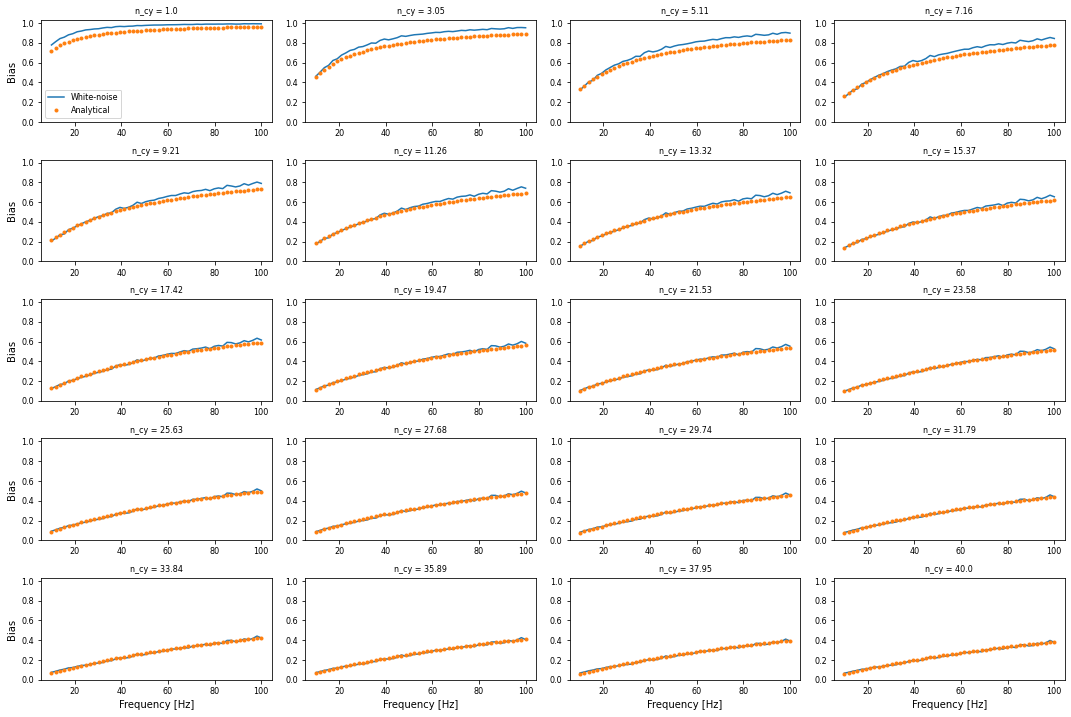

In [17]:
plt.figure(figsize=(15,10))
for i in range( len(n_cy) ):
    plt.subplot(5,4,i+1)
    plt.title(f"n_cy = {np.round(n_cy[i],2)}")
    plt.plot(freqs, B[i], '-')
    #plt.plot(freqs, [B_t[i]]*len(freqs), ".")
    plt.plot(freqs, B_t[i], ".")
    plt.ylim(0,1.03)
    if i==0: plt.legend(["White-noise", "Analytical"])
    if i>15: plt.xlabel("Frequency [Hz]")
    if i%4==0: plt.ylabel("Bias")
plt.tight_layout()